In [1]:
from genetic_algorithm import algorithms, selectors, individuals, crossover
from deap import base, creator, tools
import numpy as np
import random

# Definir los parámetros del problema
IND_SIZE = 12  # Número de genes en cada individuo

# Crear los tipos de fitness e individuo en DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", individuals.truss_like, fitness=creator.FitnessMax)

# Configuración del entorno evolutivo utilizando DEAP
toolbox = base.Toolbox()

# Registro de las funciones
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", lambda: creator.Individual(np.array([[random.choice([0, 1]) for _ in range(IND_SIZE)] for _ in range(2)]),
                                                          var = 0.5))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", lambda ind: ind.evaluate())
toolbox.register("clone", lambda ind: ind.clone())
toolbox.register("mutate", lambda ind: ind.mutate())
toolbox.register("mate", crossover.mix_crossover)
toolbox.register("select", selectors.select_individuals_elitist)

n_pop = 50
pop = toolbox.population(n=n_pop)

hall_of_fame = tools.HallOfFame(1)

# Definir estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# _lambda controla la variación en la probabilidad de mutación
population, logbook = algorithms.ea(pop, toolbox, 100, halloffame= hall_of_fame, stats= stats, _lambda = 0.9)

pm:1.4: 100%|██████████| 100/100 [03:59<00:00,  2.39s/it]


Estructura formada por aluminio (azul) y tungsteno (rojo)

Las barras son de 4 y 8 mm de diámetro

In [2]:
gen, avg, std = logbook.select("gen", "avg","std")
print(f'el promedio es  {avg[-1]}')
print(f'el desviación estándar es  {std[-1]}')

el promedio es  9.366432980030789
el desviación estándar es  0.7724302724389092


bandgap:12.346 kHz


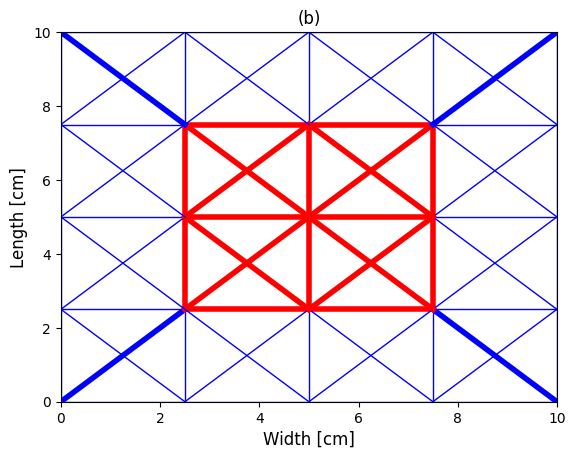

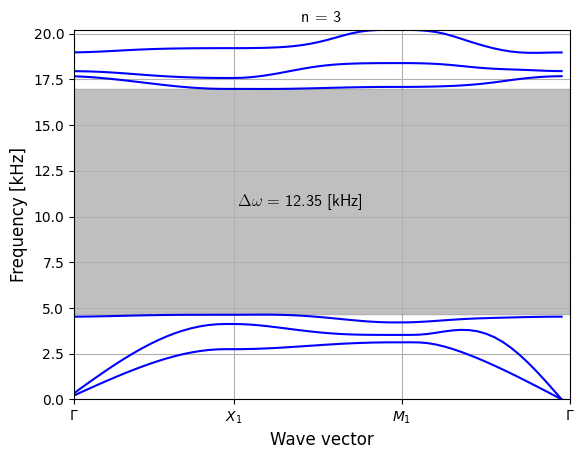

In [3]:
best_individual = hall_of_fame[0]
print(f'bandgap:{best_individual.bandgap:.3f} kHz')
best_individual.plot()


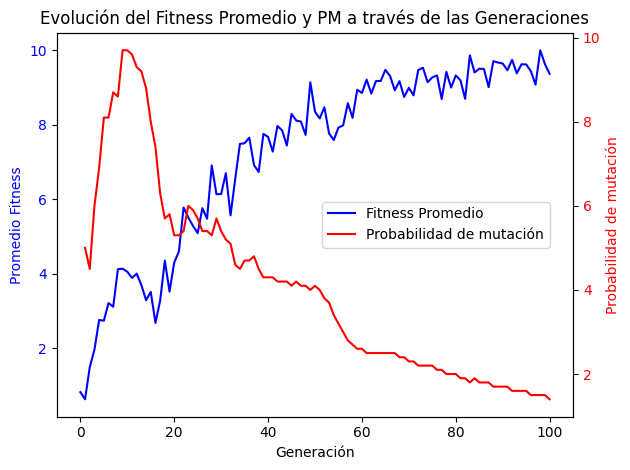

In [4]:
import matplotlib.pyplot as plt

# Supongamos que gen, avg, max y pm son listas o arrays con los datos de generaciones, promedios, máximos y pm respectivamente
gen, avg, max, pm = logbook.select("gen", "avg", "max", "pm")

# Crea la gráfica principal
fig, ax1 = plt.subplots()

ax1.plot(gen, avg, label="Fitness Promedio", color='b')
ax1.set_xlabel("Generación")
ax1.set_ylabel("Promedio Fitness", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crea un segundo eje y para 'pm'
ax2 = ax1.twinx()
ax2.plot(gen, pm, label="Probabilidad de mutación", color='r')
ax2.set_ylabel("Probabilidad de mutación", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Añade títulos y leyendas
plt.title("Evolución del Fitness Promedio y PM a través de las Generaciones")
fig.tight_layout()  # Ajusta el layout para que no se solapen los ejes

# Muestra la leyenda para ambas líneas en el centro
fig.legend(loc="center left", bbox_to_anchor=(0.5, 0.5), bbox_transform=ax1.transAxes)

# Muestra la gráfica
plt.show()




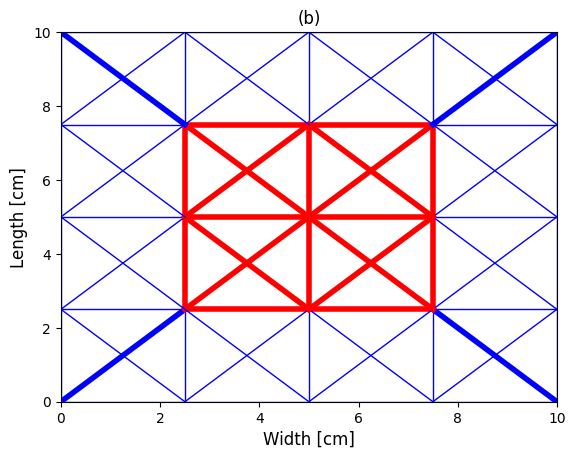

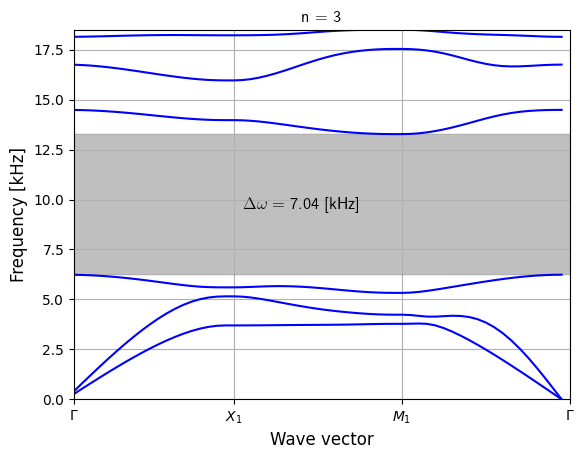

In [5]:
gens_list = [individuo.gens for individuo in population]
avg_gens = np.mean(np.array(gens_list), axis=0)
avg_gens = np.where(avg_gens >= 0.5, 1, 0)
truss = individuals.truss_like(avg_gens, var= 0.5)
truss.evaluate()
truss.plot()

In [6]:
print(logbook)

gen	nevals	pm 	avg     	std     	min     	max    
0  	25    	   	0.828065	0.922824	0.01    	2.70119
1  	50    	5  	0.636532	0.938145	0.01    	2.7708 
2  	50    	4.5	1.49585 	1.25996 	0.01    	3.43372
3  	50    	6  	1.96632 	0.754733	0.549387	3.27647
4  	50    	6.9	2.76333 	1.37784 	0.752209	6.30919
5  	50    	8.1	2.74431 	1.63947 	0.527445	5.56187
6  	50    	8.1	3.21647 	1.04934 	1.33097 	4.47498
7  	50    	8.7	3.11892 	1.38631 	0.756925	5.27966
8  	50    	8.6	4.12698 	1.88023 	0.985576	6.97999
9  	50    	9.7	4.13916 	1.19528 	1.91309 	6.22288
10 	50    	9.7	4.05719 	1.22917 	1.8473  	6.3736 
11 	50    	9.6	3.89166 	1.49027 	0.01    	6.10165
12 	50    	9.3	4.00645 	1.39062 	1.00116 	7.15279
13 	50    	9.2	3.70011 	1.46825 	0.904611	6.27128
14 	50    	8.8	3.29417 	1.20031 	0.211733	5.24917
15 	50    	8  	3.51631 	1.42013 	0.191267	5.84968
16 	50    	7.4	2.68417 	1.0645  	0.85111 	4.35967
17 	50    	6.3	3.28105 	1.2731  	0.446912	5.25657
18 	50    	5.7	4.35539 	0.88423 	2.646   	5.76108
